## Bike Price Prediction using Linear Regression
## YBIF Handson Project-04
## Yada Roshik

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [4]:
#information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [5]:
#Get Missing Values Drop
df=df.dropna()

In [6]:
#Summary Statistics
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


### Get Categories and Counts of Categorical Variables

In [7]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
Activa        3
UM            3
Harley        2
Vespa         2
Hyosung       1
Benelli       1
BMW           1
Yo            1
dtype: int64

In [8]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [9]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [10]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

### Get Column Names

In [11]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

### Get Shape of DataFrame

In [12]:
df.shape

(626, 8)

### Get Encoding of Categorical Features

In [13]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [14]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1, '3rd owner':2, '4th owner':3}},inplace=True)

### Define y (dependent or label or target variable) and X (independent or features or attribute Variable)

In [15]:
y=df['Selling_Price']

In [16]:
y.shape

(626,)

In [17]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [18]:
X= df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [19]:
X.shape

(626, 5)

In [20]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


### Get Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=182529)

In [23]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

### Get Model Train

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

### Get Model Prediction

In [27]:
y_pred =lr.predict(X_test)

In [28]:
y_pred

array([ 55615.8016203 ,  25068.77589292, 134759.66392402, 104269.38799299,
        21204.29670338,  49810.79452954, 886875.53545556,  37834.64034553,
        78684.84191761,  32382.74591174,  54289.43912625,  27625.23044241,
        25130.29384456,  53437.4820672 ,  25008.28572129,  51434.42078047,
        49838.81676917,  59344.45137404,  24585.65672644,  29774.04098375,
        54948.04890388,  46123.6740419 ,  66174.89538894,  59142.69453493,
        16595.45993567,  64844.35279176,  24653.6759053 ,  50458.22299659,
        51186.78663733,  74720.28527809,  59273.02498277, 115582.15005912,
        68730.2903724 , 141611.28957426,  36877.68198781,  45584.58691102,
        40762.53747668,  34025.53531018,  29452.25695021, 111562.38122177,
        39371.98757229,  57313.16134485,  36793.85614843, 129378.99801067,
        65545.07404786,  31980.63192969,  30772.09114284,  51745.2814938 ,
        22525.2477463 ,  29060.42321639,  57313.41182511, 109576.247191  ,
        45631.49718742,  

In [29]:
y_pred.shape

(188,)

### Get Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [31]:
mean_squared_error(y_test,y_pred)

630344053.541178

In [32]:
mean_absolute_error(y_test,y_pred)

12860.032719567913

In [33]:
r2_score(y_test,y_pred)

0.9061913300764085

### Get Visualization of Actual Vs Predicted Results

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

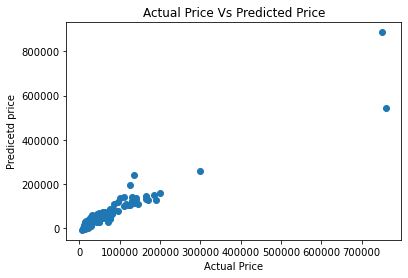

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicetd price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

### Get Future Predictions

In [36]:
df_new=df.sample(1)

In [37]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
409,Yamaha,Yamaha FZ 16,75000,2017,0,0,18000,82000.0


In [38]:
df_new.shape

(1, 8)

In [39]:
X_new = df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [40]:
X_new

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
409,2017,0,0,18000,82000.0


In [41]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 409 to 409
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1 non-null      int64  
 1   Seller_Type        1 non-null      int64  
 2   Owner              1 non-null      int64  
 3   KM_Driven          1 non-null      int64  
 4   Ex_Showroom_Price  1 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 48.0 bytes


In [42]:
y_pred_new=lr.predict(X_new)

In [43]:
y_pred_new

array([64701.23042281])